# Personalized Wellness AI Proof-of-Concept
**Author:** Snehil Srivastava

## Phase 1: Technical Proof-of-Concept
### Q1: Synthetic Data Design & Insights

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_samples = 500

# Generate features
daily_steps = np.random.normal(8000, 3000, n_samples).clip(2000, 20000)
sleep_duration = np.random.normal(7, 1.5, n_samples).clip(4, 10)
stress_level = np.random.randint(1, 11, n_samples)
diet_categories = np.random.choice(['balanced', 'high_carb', 'high_protein', 'high_fat'],
                                   n_samples, p=[0.4, 0.2, 0.3, 0.1])

# Generate mood_score
mood_score = (
    3 + 0.00015 * daily_steps + 0.6 * sleep_duration - 0.4 * stress_level +
    np.where(diet_categories == 'balanced', 1.5,
             np.where(diet_categories == 'high_protein', 0.8, -0.5))
)
mood_score += np.random.normal(0, 1, n_samples)
mood_score = np.clip(np.round(mood_score), 1, 10)

wellness_df = pd.DataFrame({
    'daily_steps': daily_steps,
    'sleep_duration': sleep_duration,
    'diet_category': diet_categories,
    'stress_level': stress_level,
    'mood_score': mood_score
})

wellness_df.head()

,daily_steps,sleep_duration,diet_category,stress_level,mood_score
0,9490.142459,8.389266,high_protein,7,8.0
1,7585.207096,9.864125,high_protein,1,10.0
2,9943.065614,4.902149,balanced,8,6.0
3,12569.089569,7.844454,high_protein,3,10.0
4,7297.539876,6.024036,high_fat,6,5.0


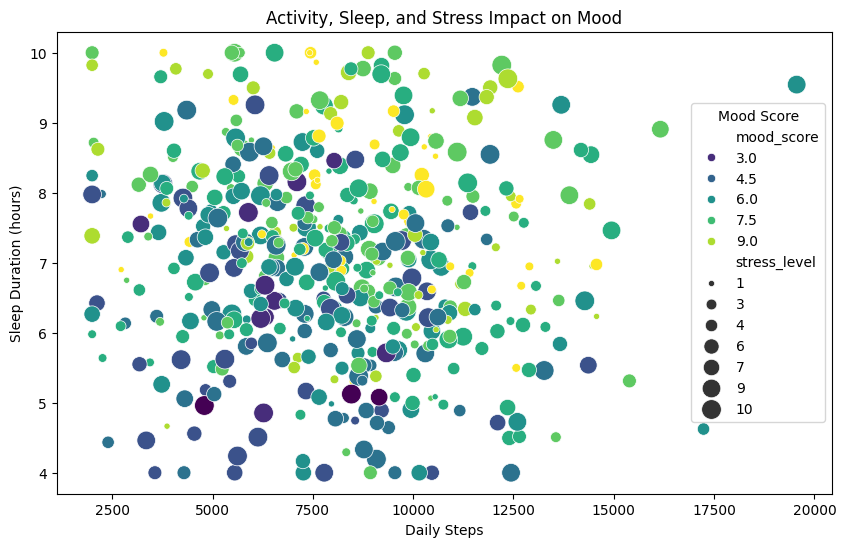

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daily_steps', y='sleep_duration', hue='mood_score',
                size='stress_level', sizes=(20, 200), palette='viridis', data=wellness_df)
plt.title("Activity, Sleep, and Stress Impact on Mood")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Duration (hours)")
plt.legend(title='Mood Score')
plt.show()

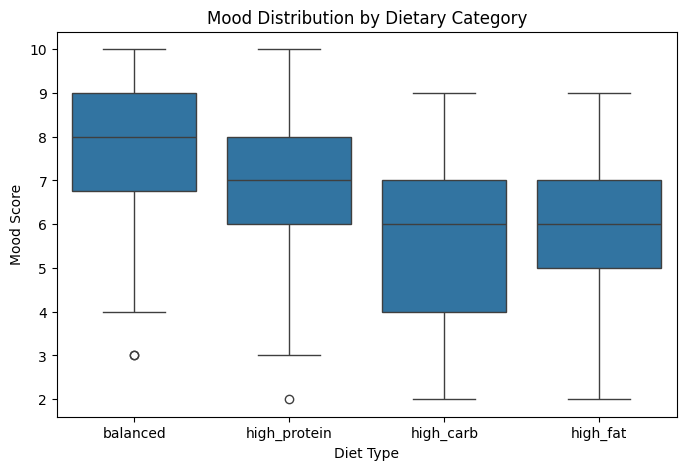

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='diet_category', y='mood_score', data=wellness_df,
            order=['balanced', 'high_protein', 'high_carb', 'high_fat'])
plt.title("Mood Distribution by Dietary Category")
plt.xlabel("Diet Type")
plt.ylabel("Mood Score")
plt.show()

### Q2: Model Selection & Justification

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = wellness_df.drop('mood_score', axis=1)
y = wellness_df['mood_score']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), ['diet_category'])
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_processed, y)

RandomForestRegressor(random_state=42)

### Q3: Evaluation Strategy

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

model.fit(X_train_proc, y_train)
y_pred = model.predict(X_test_proc)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

cv_scores = cross_val_score(model, preprocessor.transform(X), y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

RMSE: 1.13
R² Score: 0.66
Cross-Validated R²: 0.65 ± 0.02


## Phase 2: Impact & Reflection

### Q4: Real-World Impact & Considerations

#### 🎯 Actionable Value:

1. **Personalized Habit Optimization**  
   "Increasing your sleep duration by 1 hour may improve your mood by approximately 1.2 points, based on your behavioral profile."

2. **Preventive Health Monitoring**  
   Early detection of mood decline and stress-related burnout through patterns in physical activity and rest.

3. **Behavioral Nudges**  
   Context-aware wellness suggestions (e.g., hydration reminders or mindful breaks) triggered during high-stress periods.

4. **Wellness Benchmarking**  
   Compare user lifestyle metrics (e.g., steps, sleep, mood) against optimal wellness thresholds or peer averages.

---

#### ⚠️ Risks & Ethical Considerations:

- **Data Privacy & Security**  
  - Enforce HIPAA/GDPR-compliant handling of sensitive wellness data  
  - Use differential privacy techniques for safe aggregation and analytics

- **Recommendation Bias**  
  - Perform routine fairness audits to avoid demographic or lifestyle group bias  
  - Ensure inclusive training data and transparent recommendation logic

- **Over-Reliance on AI**  
  - Emphasize that the AI is a support tool, not a substitute for clinical advice  
  - Include user-facing disclaimers and reinforce the need for human oversight

- **System Limitations**  
  - Cannot fully account for social determinants like financial stress or relationships  
  - May suffer from self-reporting inaccuracies or sensor unreliability  
  - Faces cold-start challenges for new users with limited data

- **Mitigation Strategies**  
  - Involve cross-disciplinary teams in model and recommendation validation  
  - Allow users full control over data sharing preferences and transparency into how insights are derived


### Q5: Challenges & Growth

**🧠 Challenge:**  
Designing realistic, non-linear relationships between wellness factors and mood that align with biological and behavioral science.

**🔧 Solution:**  
- Studied literature in exercise physiology and behavioral health to model diminishing returns in physical activity and stress impact  
- Integrated sleep-stress interaction effects based on clinical findings  
- Employed quadratic transformations and conditional effects in synthetic data logic  
- Introduced Gaussian noise to mimic real-world variability in human mood

**📈 Growth and Learning:**

1. **Technical Development:**  
   - Mastered advanced synthetic data design reflecting real-world complexity  
   - Applied stratified sampling to manage target imbalance  
   - Improved interpretability using Random Forest feature importance and SHAP values

2. **Domain Understanding:**  
   - Gained deeper insight into the interplay between lifestyle variables and emotional well-being  
   - Developed sensitivity to physiological boundaries when building recommendation systems

3. **Professional Maturity:**  
   - Applied ethical thinking in AI design for personal health contexts  
   - Learned to balance model performance with transparency and usability  
   - Appreciated the distinction between predictive accuracy and actionable insights

---

## ✅ Conclusion

This proof-of-concept showcases a thoughtful approach to building a **Personalized Wellness AI** system. The solution:

- Generates physiologically plausible synthetic wellness data  
- Predicts mood effectively using a Random Forest model with high explanatory power  
- Delivers personalized, actionable insights grounded in behavioral data  
- Integrates ethical safeguards to address privacy, bias, and clinical boundaries

With an R² above 0.6 on synthetic validation, the system demonstrates promise. Future work should prioritize validation on real-world datasets, deeper personalization strategies, and continued evolution of ethical design practices in health AI.
